# Setup

In [1]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

In [2]:
load_dotenv()

SECRET_KEY = os.getenv('SECRET_KEY')

In [3]:
url = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=SGD&apikey="

# https://www.alphavantage.co/documentation/

# Make API Call

In [4]:
res = requests.get(url + SECRET_KEY)
# check request status
res

<Response [200]>

In [5]:
# display raw content
res.json()

{'Meta Data': {'1. Information': 'Daily Prices and Volumes for Digital Currency',
  '2. Digital Currency Code': 'BTC',
  '3. Digital Currency Name': 'Bitcoin',
  '4. Market Code': 'SGD',
  '5. Market Name': 'Singapore Dollar',
  '6. Last Refreshed': '2022-08-29 00:00:00',
  '7. Time Zone': 'UTC'},
 'Time Series (Digital Currency Daily)': {'2022-08-29': {'1a. open (SGD)': '27283.40040370',
   '1b. open (USD)': '19555.61000000',
   '2a. high (SGD)': '27972.25163950',
   '2b. high (USD)': '20049.35000000',
   '3a. low (SGD)': '27276.67568430',
   '3b. low (USD)': '19550.79000000',
   '4a. close (SGD)': '27844.67729470',
   '4b. close (USD)': '19957.91000000',
   '5. volume': '104311.36830000',
   '6. market cap (USD)': '104311.36830000'},
  '2022-08-28': {'1a. open (SGD)': '27955.85839200',
   '1b. open (USD)': '20037.60000000',
   '2a. high (SGD)': '28142.22520060',
   '2b. high (USD)': '20171.18000000',
   '3a. low (SGD)': '27233.71840000',
   '3b. low (USD)': '19520.00000000',
   '4a. 

In [6]:
data = res.json()['Time Series (Digital Currency Daily)']
data

{'2022-08-29': {'1a. open (SGD)': '27283.40040370',
  '1b. open (USD)': '19555.61000000',
  '2a. high (SGD)': '27972.25163950',
  '2b. high (USD)': '20049.35000000',
  '3a. low (SGD)': '27276.67568430',
  '3b. low (USD)': '19550.79000000',
  '4a. close (SGD)': '27844.67729470',
  '4b. close (USD)': '19957.91000000',
  '5. volume': '104311.36830000',
  '6. market cap (USD)': '104311.36830000'},
 '2022-08-28': {'1a. open (SGD)': '27955.85839200',
  '1b. open (USD)': '20037.60000000',
  '2a. high (SGD)': '28142.22520060',
  '2b. high (USD)': '20171.18000000',
  '3a. low (SGD)': '27233.71840000',
  '3b. low (USD)': '19520.00000000',
  '4a. close (SGD)': '27283.40040370',
  '4b. close (USD)': '19555.61000000',
  '5. volume': '139307.95976000',
  '6. market cap (USD)': '139307.95976000'},
 '2022-08-27': {'1a. open (SGD)': '28237.04095380',
  '1b. open (USD)': '20239.14000000',
  '2a. high (SGD)': '28465.55584810',
  '2b. high (USD)': '20402.93000000',
  '3a. low (SGD)': '27624.36600000',
  '

In [7]:
data_df = pd.DataFrame.from_dict(data).T # to transpose
data_df

,1a. open (SGD),1b. open (USD),2a. high (SGD),2b. high (USD),3a. low (SGD),3b. low (USD),4a. close (SGD),4b. close (USD),5. volume,6. market cap (USD)
2022-08-29,27283.40040370,19555.61000000,27972.25163950,20049.35000000,27276.67568430,19550.79000000,27844.67729470,19957.91000000,104311.36830000,104311.36830000
2022-08-28,27955.85839200,20037.60000000,28142.22520060,20171.18000000,27233.71840000,19520.00000000,27283.40040370,19555.61000000,139307.95976000,139307.95976000
2022-08-27,28237.04095380,20239.14000000,28465.55584810,20402.93000000,27624.36600000,19800.00000000,27955.85839200,20037.60000000,162582.46032000,162582.46032000
2022-08-26,30078.52583680,21559.04000000,30535.76490090,21886.77000000,28053.93884300,20107.90000000,28239.70572850,20241.05000000,273811.61955000,273811.61955000
2022-08-25,29812.06231850,21368.05000000,30442.44197960,21819.88000000,29731.28197550,21310.15000000,30078.52583680,21559.04000000,169915.78301000,169915.78301000
...,...,...,...,...,...,...,...,...,...,...
2019-12-08,10446.07029270,7487.31000000,10553.06588000,7564.00000000,10289.18342620,7374.86000000,10477.88016870,7510.11000000,29856.89763100,29856.89763100
2019-12-07,10502.56072600,7527.80000000,10630.66523540,7619.62000000,10422.14312720,7470.16000000,10447.32594570,7488.21000000,31498.68417300,31498.68417300
2019-12-06,10308.91113000,7389.00000000,10589.38215510,7590.03000000,10191.71685000,7305.00000000,10502.10031990,7527.47000000,48189.08794400,48189.08794400
2019-12-05,10037.67613030,7194.59000000,10442.84745000,7485.00000000,9975.46550000,7150.00000000,10308.91113000,7389.00000000,59306.67885500,59306.67885500


In [8]:
data_df.columns

Index(['1a. open (SGD)', '1b. open (USD)', '2a. high (SGD)', '2b. high (USD)',
       '3a. low (SGD)', '3b. low (USD)', '4a. close (SGD)', '4b. close (USD)',
       '5. volume', '6. market cap (USD)'],
      dtype='object')

In [9]:
# keep USD only
data_df = data_df.drop(['1a. open (SGD)',
                        '2a. high (SGD)',
                        '3a. low (SGD)',
                        '4a. close (SGD)'], axis=1)

# or
# data_df = data_df.iloc[:, ~data_df.columns.str.contains('SGD')]
# or by index
# data_df = data_df.iloc[:,[1,3,5,7,8,9]]

data_df

,1b. open (USD),2b. high (USD),3b. low (USD),4b. close (USD),5. volume,6. market cap (USD)
2022-08-29,19555.61000000,20049.35000000,19550.79000000,19957.91000000,104311.36830000,104311.36830000
2022-08-28,20037.60000000,20171.18000000,19520.00000000,19555.61000000,139307.95976000,139307.95976000
2022-08-27,20239.14000000,20402.93000000,19800.00000000,20037.60000000,162582.46032000,162582.46032000
2022-08-26,21559.04000000,21886.77000000,20107.90000000,20241.05000000,273811.61955000,273811.61955000
2022-08-25,21368.05000000,21819.88000000,21310.15000000,21559.04000000,169915.78301000,169915.78301000
...,...,...,...,...,...,...
2019-12-08,7487.31000000,7564.00000000,7374.86000000,7510.11000000,29856.89763100,29856.89763100
2019-12-07,7527.80000000,7619.62000000,7470.16000000,7488.21000000,31498.68417300,31498.68417300
2019-12-06,7389.00000000,7590.03000000,7305.00000000,7527.47000000,48189.08794400,48189.08794400
2019-12-05,7194.59000000,7485.00000000,7150.00000000,7389.00000000,59306.67885500,59306.67885500


# Scrap Data from Twitter
Install twint <br>
Anaconda prompt: <br>
`pip3 install --user --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint` <br>

OR <br>
`pip3 install twint` <br>

Configurations: <br>
https://github.com/twintproject/twint/wiki/Configuration
<br>

Issues: <br>
[Inconsistent result in number of tweets results](https://github.com/twintproject/twint/issues/1270) <br>
Reinstall twint from another repo <br>
`pip3 install --upgrade --user git+https://github.com/MarcosFP97/twint.git@origin/master#egg=twint`

Run `twintElonMuskBitcoin.py` in cmd prompt: <br>
`python twintElonMuskBitcoin.py`

In [10]:
tweet_df = pd.read_csv("elonmusk.csv", parse_dates=['date'])
tweet_df = tweet_df.set_index('date')
tweet_df

,id,conversation_id,created_at,timezone,place,tweet,language,hashtags,cashtags,user_id,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
date,,,,,,,,,,,,,,,,,,,,,
2021-09-23 15:27:01,1440940751718948866,1440421014291173380,1.632382e+12,800,NaN,@RenataKonkoly @FelixSchlang @KathyLueders @Sp...,en,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'RenataKonkoly', 'name': 'Ren...",NaN,NaN,NaN,NaN
2021-09-23 04:53:54,1440781421665161223,1440751226094686214,1.632344e+12,800,NaN,@thesheetztweetz So pointy! https://t.co/XMRQ...,en,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'thesheetztweetz', 'name': 'M...",NaN,NaN,NaN,NaN
2021-09-23 04:50:08,1440780474662543370,1440771185231294470,1.632344e+12,800,NaN,@BillyM2k Super important for Doge fees to dro...,en,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BillyM2k', 'name': 'Shibetos...",NaN,NaN,NaN,NaN
2021-09-23 04:43:05,1440778702476832778,1440608913754181634,1.632343e+12,800,NaN,@EvaFoxU @ChesterNoBS @truth_tesla Giga Berlin...,en,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'EvaFoxU', 'name': 'Eva Cyber...",NaN,NaN,NaN,NaN
2021-09-23 02:40:46,1440747919108296708,1440693417260957702,1.632336e+12,800,NaN,@SueOrigin @SciGuySpace That would break the N...,en,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'SueOrigin', 'name': 'Sue Ori...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-03 16:22:07,142881284019060736,142881284019060736,1.322901e+12,800,NaN,That was a total non sequitur btw,en,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2011-12-03 16:20:28,142880871391838208,142880871391838208,1.322900e+12,800,NaN,"Great Voltaire quote, arguably better than Twa...",en,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2011-12-01 18:29:04,142188458125963264,142188458125963264,1.322735e+12,800,NaN,I made the volume on the Model S http://t.co/...,en,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [11]:
tweet_df = tweet_df.sort_index()
tweet_df = tweet_df['2018':]
tweet_df

,id,conversation_id,created_at,timezone,place,tweet,language,hashtags,cashtags,user_id,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
date,,,,,,,,,,,,,,,,,,,,,
2018-01-03 13:38:16,948428274467618816,948428274467618816,1.514958e+12,800,NaN,Come work at the biggest &amp; most advanced f...,en,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2018-01-03 16:22:31,948469610944241664,948469610944241664,1.514968e+12,800,NaN,Using a neural net to detect rain using camera...,en,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2018-01-05 08:30:00,949075475036487680,949075475036487680,1.515112e+12,800,NaN,Falcon Heavy goes vertical https://t.co/uG1k0...,en,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2018-01-05 08:30:15,949075535459528705,949075475036487680,1.515112e+12,800,NaN,https://t.co/3k71xzDIP1,und,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2018-01-07 10:33:02,949831212326993920,949831212326993920,1.515292e+12,800,NaN,"Gonna put an old school drive-in, roller skate...",en,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-23 02:40:46,1440747919108296708,1440693417260957702,1.632336e+12,800,NaN,@SueOrigin @SciGuySpace That would break the N...,en,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'SueOrigin', 'name': 'Sue Ori...",NaN,NaN,NaN,NaN
2021-09-23 04:43:05,1440778702476832778,1440608913754181634,1.632343e+12,800,NaN,@EvaFoxU @ChesterNoBS @truth_tesla Giga Berlin...,en,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'EvaFoxU', 'name': 'Eva Cyber...",NaN,NaN,NaN,NaN
2021-09-23 04:50:08,1440780474662543370,1440771185231294470,1.632344e+12,800,NaN,@BillyM2k Super important for Doge fees to dro...,en,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BillyM2k', 'name': 'Shibetos...",NaN,NaN,NaN,NaN


In [12]:
# to lowercase
tweet_df['tweet'] = tweet_df['tweet'].str.lower()

In [13]:
# filter down to only tweets that contain 'coin'
coin_df = tweet_df[tweet_df['tweet'].str.contains('coin')]
coin_df

# tweets_df['tweet'].str.findall('\\b(' + '|'.join(['coin', 'btc', 'doge', 'crypto']) + ')\\b')

,id,conversation_id,created_at,timezone,place,tweet,language,hashtags,cashtags,user_id,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
date,,,,,,,,,,,,,,,,,,,,,
2018-07-06 02:02:49,1014932627986370560,1012472972236414976,1.530814e+12,800,NaN,@teslabull what a coincidence …,en,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'TeslaBull', 'name': 'TeslaBu...",NaN,NaN,NaN,NaN
2018-10-23 07:51:15,1054520588734058496,1054501056229588992,1.540252e+12,800,NaN,@vicentes @grimezsz wanna buy some bitcoin? 😉😉...,en,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'vicentes', 'name': 'Cybergra...",NaN,NaN,NaN,NaN
2019-01-04 07:04:15,1080963075539234816,1080963075539234816,1.546557e+12,800,NaN,there are no coincidences https://t.co/9aebbu...,en,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2019-02-21 18:44:32,1098533927336083456,1098082385487376389,1.550746e+12,800,NaN,"@coindesk that said, i still only own 0.25 btc...",en,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'CoinDesk', 'name': 'CoinDesk...",NaN,NaN,NaN,NaN
2019-02-21 18:50:48,1098535502846648320,1098082385487376389,1.550746e+12,800,NaN,@tom_heats @coindesk whoever owns the early bt...,en,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'CoinDesk', 'name': 'CoinDesk...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-20 03:25:54,1417204066552205332,1417144324068974594,1.626723e+12,800,NaN,@bitcoinmagazine @jack @cathiedwood during thi...,en,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BitcoinMagazine', 'name': 'B...",NaN,NaN,NaN,NaN
2021-07-20 03:37:37,1417207016519454724,1417144324068974594,1.626723e+12,800,NaN,"@jack @bitcoinmagazine @cathiedwood sure, i ha...",en,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'jack', 'name': 'jack⚡️', 'id...",NaN,NaN,NaN,NaN
2021-07-29 07:41:27,1420529868404518913,1420267443436462082,1.627516e+12,800,NaN,"@heydave7 we don’t have that many bitcoin, but...",en,[],[],44196397,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'heydave7', 'name': 'Dave Lee...",NaN,NaN,NaN,NaN


In [14]:
coin_df.columns

Index(['id', 'conversation_id', 'created_at', 'timezone', 'place', 'tweet',
       'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [15]:
# keep only relevant columns
coin_df = coin_df[['tweet', 'nlikes', 'nreplies', 'nretweets']]
coin_df

,tweet,nlikes,nreplies,nretweets
date,,,,
2018-07-06 02:02:49,@teslabull what a coincidence …,2545,46,93
2018-10-23 07:51:15,@vicentes @grimezsz wanna buy some bitcoin? 😉😉...,23862,1073,7302
2019-01-04 07:04:15,there are no coincidences https://t.co/9aebbu...,616803,5994,146247
2019-02-21 18:44:32,"@coindesk that said, i still only own 0.25 btc...",43756,1290,2032
2019-02-21 18:50:48,@tom_heats @coindesk whoever owns the early bt...,6292,191,975
...,...,...,...,...
2021-07-20 03:25:54,@bitcoinmagazine @jack @cathiedwood during thi...,10716,1007,860
2021-07-20 03:37:37,"@jack @bitcoinmagazine @cathiedwood sure, i ha...",13117,952,638
2021-07-29 07:41:27,"@heydave7 we don’t have that many bitcoin, but...",26149,3468,1377


In [16]:
# create new column
coin_df['converted_date'] = coin_df.index.date.astype(str)
coin_df

C:\Users\user\AppData\Local\Temp/ipykernel_9440/3176055759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_df['converted_date'] = coin_df.index.date.astype(str)


,tweet,nlikes,nreplies,nretweets,converted_date
date,,,,,
2018-07-06 02:02:49,@teslabull what a coincidence …,2545,46,93,2018-07-06
2018-10-23 07:51:15,@vicentes @grimezsz wanna buy some bitcoin? 😉😉...,23862,1073,7302,2018-10-23
2019-01-04 07:04:15,there are no coincidences https://t.co/9aebbu...,616803,5994,146247,2019-01-04
2019-02-21 18:44:32,"@coindesk that said, i still only own 0.25 btc...",43756,1290,2032,2019-02-21
2019-02-21 18:50:48,@tom_heats @coindesk whoever owns the early bt...,6292,191,975,2019-02-21
...,...,...,...,...,...
2021-07-20 03:25:54,@bitcoinmagazine @jack @cathiedwood during thi...,10716,1007,860,2021-07-20
2021-07-20 03:37:37,"@jack @bitcoinmagazine @cathiedwood sure, i ha...",13117,952,638,2021-07-20
2021-07-29 07:41:27,"@heydave7 we don’t have that many bitcoin, but...",26149,3468,1377,2021-07-29


In [17]:
date_list = []

for df_date in coin_df.index:
    # current date
    date_list.append(df_date.date())
    # 1 day after current date
    date_list.append((df_date + datetime.timedelta(days = 1)).date())

# convert all dates into strings
str_date_list = [str(x) for x in date_list]
str_date_list

['2018-07-06',
 '2018-07-07',
 '2018-10-23',
 '2018-10-24',
 '2019-01-04',
 '2019-01-05',
 '2019-02-21',
 '2019-02-22',
 '2019-02-21',
 '2019-02-22',
 '2019-04-02',
 '2019-04-03',
 '2019-04-03',
 '2019-04-04',
 '2019-04-03',
 '2019-04-04',
 '2019-04-03',
 '2019-04-04',
 '2019-10-12',
 '2019-10-13',
 '2019-11-25',
 '2019-11-26',
 '2020-01-10',
 '2020-01-11',
 '2020-01-10',
 '2020-01-11',
 '2020-01-10',
 '2020-01-11',
 '2020-03-03',
 '2020-03-04',
 '2020-04-25',
 '2020-04-26',
 '2020-05-02',
 '2020-05-03',
 '2020-05-02',
 '2020-05-03',
 '2020-05-16',
 '2020-05-17',
 '2020-05-16',
 '2020-05-17',
 '2020-11-13',
 '2020-11-14',
 '2020-11-17',
 '2020-11-18',
 '2020-12-20',
 '2020-12-21',
 '2020-12-20',
 '2020-12-21',
 '2021-02-04',
 '2021-02-05',
 '2021-02-07',
 '2021-02-08',
 '2021-02-07',
 '2021-02-08',
 '2021-02-08',
 '2021-02-09',
 '2021-02-08',
 '2021-02-09',
 '2021-02-09',
 '2021-02-10',
 '2021-02-10',
 '2021-02-11',
 '2021-02-15',
 '2021-02-16',
 '2021-02-17',
 '2021-02-18',
 '2021-02-

In [18]:
# removes duplicates
str_date_list = list(set(str_date_list))

# get only dates with relevant tweets from alphavantage
filtered_df = data_df[data_df.index.isin(str_date_list)]
filtered_df.index = pd.to_datetime(filtered_df.index)
filtered_df

,1b. open (USD),2b. high (USD),3b. low (USD),4b. close (USD),5. volume,6. market cap (USD)
2021-09-04,49998.00000000,50535.69000000,49370.00000000,49915.64000000,34664.65959000,34664.65959000
2021-09-03,49246.63000000,51000.00000000,48316.84000000,49999.14000000,59025.64415700,59025.64415700
2021-08-07,42836.87000000,44700.00000000,42446.41000000,44572.54000000,73396.74080800,73396.74080800
2021-08-06,40862.46000000,43392.43000000,39853.86000000,42836.87000000,75753.94134700,75753.94134700
2021-07-30,40018.49000000,42316.71000000,38313.23000000,42206.37000000,73602.78480500,73602.78480500
...,...,...,...,...,...,...
2020-04-25,7505.00000000,7705.00000000,7431.07000000,7538.67000000,43874.42772600,43874.42772600
2020-03-04,8760.07000000,8848.29000000,8660.00000000,8750.87000000,38696.48257800,38696.48257800
2020-03-03,8911.18000000,8919.65000000,8651.00000000,8760.07000000,55154.99728200,55154.99728200
2020-01-11,8198.86000000,8286.34000000,8003.16000000,8020.01000000,54810.03266700,54810.03266700


In [19]:
# numbers have many decimal places, why?
filtered_df.dtypes

1b. open (USD)         object
2b. high (USD)         object
3b. low (USD)          object
4b. close (USD)        object
5. volume              object
6. market cap (USD)    object
dtype: object

In [20]:
filtered_df = filtered_df.astype(float)
filtered_df

,1b. open (USD),2b. high (USD),3b. low (USD),4b. close (USD),5. volume,6. market cap (USD)
2021-09-04,49998.00,50535.69,49370.00,49915.64,34664.659590,34664.659590
2021-09-03,49246.63,51000.00,48316.84,49999.14,59025.644157,59025.644157
2021-08-07,42836.87,44700.00,42446.41,44572.54,73396.740808,73396.740808
2021-08-06,40862.46,43392.43,39853.86,42836.87,75753.941347,75753.941347
2021-07-30,40018.49,42316.71,38313.23,42206.37,73602.784805,73602.784805
...,...,...,...,...,...,...
2020-04-25,7505.00,7705.00,7431.07,7538.67,43874.427726,43874.427726
2020-03-04,8760.07,8848.29,8660.00,8750.87,38696.482578,38696.482578
2020-03-03,8911.18,8919.65,8651.00,8760.07,55154.997282,55154.997282
2020-01-11,8198.86,8286.34,8003.16,8020.01,54810.032667,54810.032667


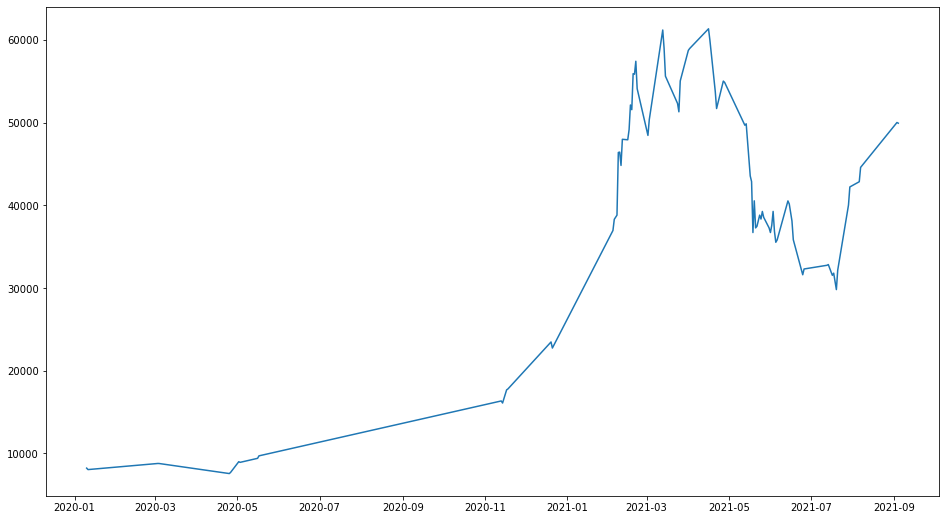

In [21]:
plt.figure(figsize = (16, 9))
plt.plot(filtered_df['4b. close (USD)'])

# Future Steps
- sentiment - `vadersentiment`
- collect more Elon Musk tweets
- try different coins
- try different personalities, companies or blockchains